In [1]:
import os

import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from glob import glob
from tqdm import tqdm
from tqdm.auto import tqdm
from PIL import Image
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from IPython.display import set_matplotlib_formats

sns.set(style='white', context='notebook', palette='deep')
line_color = ['#FFBF00','#FF7F50','#DE3163','#9FE2BF','#40E0D0','#6495ED','#117A65','#2471A3','#CCCCFF','#8E44AD','#CD5C5C' ,'#F08080','#FA8072' ,'#E9967A' ,'#FFA07A']
plt.style.use('fivethirtyeight')
plt.style.use("seaborn-whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
print(plt.rcParams['font.family'])
%matplotlib inline

['Malgun Gothic']


# aws

## 데이터 불러오기

In [2]:
aws_data=pd.read_csv('data/AWS_Day(2001_2022).csv')
aws_data['일시']=pd.to_datetime(aws_data['일시'])

In [3]:
aws_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893009 entries, 0 to 3893008
Data columns (total 13 columns):
 #   Column            Dtype         
---  ------            -----         
 0   지점                int64         
 1   지점명               object        
 2   일시                datetime64[ns]
 3   평균기온(°C)          float64       
 4   최저기온(°C)          float64       
 5   최저기온 시각(hhmi)     float64       
 6   최고기온(°C)          float64       
 7   최고기온 시각(hhmi)     float64       
 8   일강수량(mm)          float64       
 9   최대 순간 풍속(m/s)     float64       
 10  최대 순간풍속 시각(hhmi)  float64       
 11  평균 풍속(m/s)        float64       
 12  최대 순간 풍속 풍향(deg)  float64       
dtypes: datetime64[ns](1), float64(10), int64(1), object(1)
memory usage: 386.1+ MB


In [4]:
aws_data.drop(['최저기온(°C)','최저기온 시각(hhmi)','최고기온(°C)','최고기온 시각(hhmi)','최대 순간 풍속(m/s)','최대 순간풍속 시각(hhmi)','최대 순간 풍속 풍향(deg)'],axis=1,inplace=True)

## 지수가중이동평균 결측치 채우기

In [5]:
aws_loc=aws_data['지점'].unique()
aws_loc=aws_loc.tolist() # aws에 있는 전체 지점 

In [8]:
N=15
aws_interpoloate=[]  # 지점별로 결측치가 보간된 데이터프레임을 저장 
for i in tqdm(range(len(aws_loc))):
    tmp=aws_data[aws_data['지점']==aws_loc[i]]
    tmp.reset_index(drop=True,inplace=True)
    for j in tmp.columns.drop(['지점명','일시']):
        tmp2 = tmp[[j]].ewm(alpha=2/(N+1),adjust=True,min_periods=1).mean()  # 지수가중이동평균으로 결측치 보간 
        idx=tmp[tmp[j].isna()==1].index # 결측치에 해당하는 인덱스
        idx=idx.tolist()
        for k in range(len(idx)):
            tmp.at[idx[k],j] = tmp2.iloc[idx[k]][j]  # 결측치에 해당하는 부분만 보간(기존값은 바꾸지 않음)
    aws_interpoloate.append(tmp)

  0%|          | 0/547 [00:00<?, ?it/s]

In [13]:
aws_interpoloate[20]

지점  지점명         일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)
0     311  가야산 2001-09-25       NaN       0.0         NaN
1     311  가야산 2001-09-26      14.1       0.0         0.3
2     311  가야산 2001-09-27      14.5       0.0         0.5
3     311  가야산 2001-09-28      14.8       0.0         0.8
4     311  가야산 2001-09-29      14.4       0.0         0.5
...   ...  ...        ...       ...       ...         ...
7741  311  가야산 2022-12-27      -4.5       0.0         0.7
7742  311  가야산 2022-12-28      -3.8       0.0         1.3
7743  311  가야산 2022-12-29      -5.3       0.0         1.7
7744  311  가야산 2022-12-30      -4.2       0.0         1.1
7745  311  가야산 2022-12-31      -4.4       0.0         1.7

[7746 rows x 6 columns]

## 결과

(array([575., 600., 625., 650., 675., 700., 725., 750., 775., 800., 825.]),
 [Text(575.0, 0, '575'),
  Text(600.0, 0, '600'),
  Text(625.0, 0, '625'),
  Text(650.0, 0, '650'),
  Text(675.0, 0, '675'),
  Text(700.0, 0, '700'),
  Text(725.0, 0, '725'),
  Text(750.0, 0, '750'),
  Text(775.0, 0, '775'),
  Text(800.0, 0, '800'),
  Text(825.0, 0, '825')])

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 [Text(0, -10.0, '-10'),
  Text(0, -5.0, '-5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25')])

Text(0, 0.5, '평균기온(°C)')

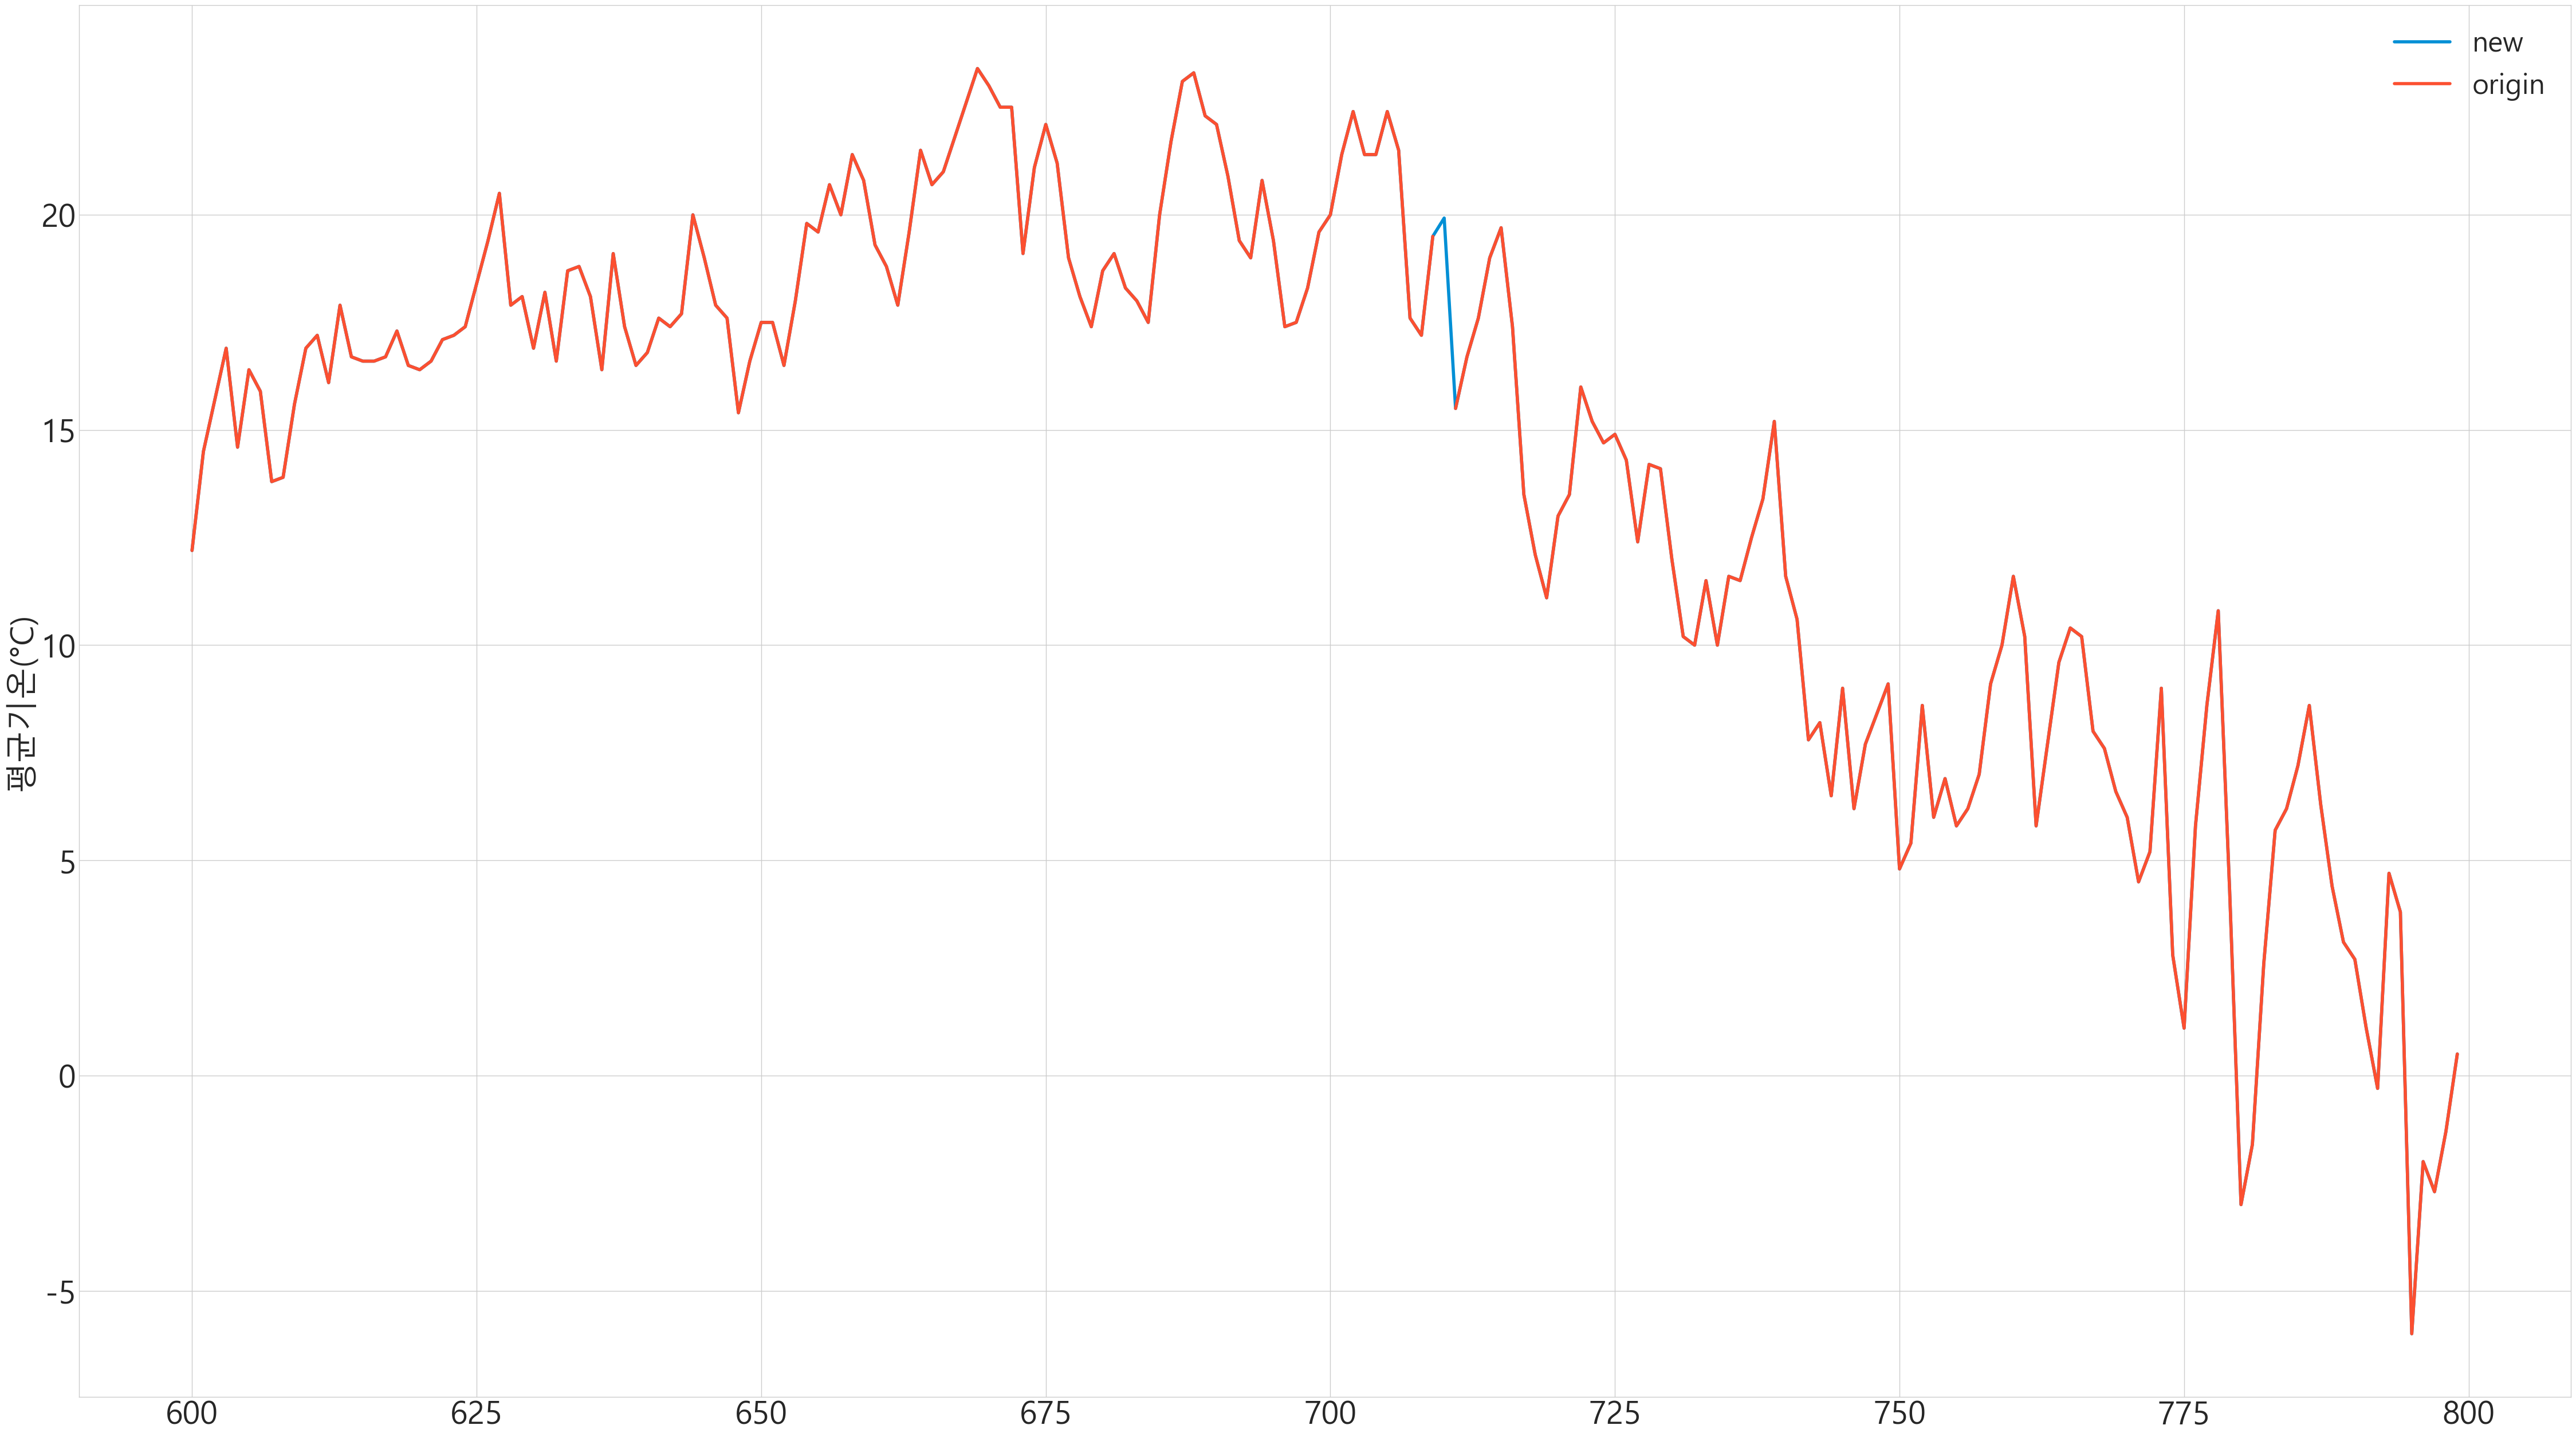

In [14]:
a=aws_interpoloate[20]  # 결측치를 보간한 데이터 
b=aws_data[aws_data['지점']==311] # 결측치가 있는 원본 데이터 
b.reset_index(drop=True,inplace=True) 

# default parameter
start=600
end=800

fig=plt.figure(figsize=(50,30),facecolor='white')
plt.plot(a.index[start:end],a['평균기온(°C)'][start:end])
plt.plot(a.index[start:end],b['평균기온(°C)'][start:end])
plt.xticks(fontsize= 40)
plt.yticks(fontsize= 40)
plt.ylabel("평균기온(°C)",fontsize= 40)
plt.legend(['new','origin'],fontsize=35)
plt.show()

In [16]:
imputed_data=pd.DataFrame()
for i in tqdm(range(len(aws_interpoloate))):
    imputed_data=pd.concat([imputed_data,aws_interpoloate[i]],axis=0)
    imputed_data.reset_index(drop=True,inplace=True)
imputed_data

  0%|          | 0/547 [00:00<?, ?it/s]

지점     지점명         일시  평균기온(°C)  일강수량(mm)  평균 풍속(m/s)
0         12  안면도(감) 2001-10-12       NaN       0.0         NaN
1         12  안면도(감) 2002-01-04       NaN       0.0         NaN
2         12  안면도(감) 2002-01-18       NaN       0.0         NaN
3         12  안면도(감) 2002-01-19       NaN       0.0         NaN
4         12  안면도(감) 2002-02-01       NaN       0.0         NaN
...      ...     ...        ...       ...       ...         ...
3893004  967     도리도 2022-12-27      -0.9       0.0         2.0
3893005  967     도리도 2022-12-28      -1.6       0.0         1.2
3893006  967     도리도 2022-12-29      -1.8       0.0         2.4
3893007  967     도리도 2022-12-30      -1.1       0.0         1.4
3893008  967     도리도 2022-12-31       1.5       0.0         3.6

[3893009 rows x 6 columns]

In [17]:
imputed_data.info(null_counts=True) # 결측치를 보간한 데이터 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893009 entries, 0 to 3893008
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   지점          3893009 non-null  int64         
 1   지점명         3893009 non-null  object        
 2   일시          3893009 non-null  datetime64[ns]
 3   평균기온(°C)    3884070 non-null  float64       
 4   일강수량(mm)    3893009 non-null  float64       
 5   평균 풍속(m/s)  3856324 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 178.2+ MB


In [18]:
aws_data.info(null_counts=True) # 결측치 보간 전 데이터 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893009 entries, 0 to 3893008
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   지점          3893009 non-null  int64         
 1   지점명         3893009 non-null  object        
 2   일시          3893009 non-null  datetime64[ns]
 3   평균기온(°C)    3855397 non-null  float64       
 4   일강수량(mm)    3861601 non-null  float64       
 5   평균 풍속(m/s)  3813595 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 178.2+ MB


In [20]:
imputed_data.to_csv('imputed_aws(ewm).csv',encoding='cp949')

# ASOS

## 데이터 불러오기 

In [22]:
asos_data=pd.read_csv('data/ASOS_Day(2001_2022).csv')
asos_data['일시']=pd.to_datetime(asos_data['일시'])

In [23]:
asos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702251 entries, 0 to 702250
Data columns (total 62 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   지점                   702251 non-null  float64       
 1   지점명                  702251 non-null  object        
 2   일시                   702251 non-null  datetime64[ns]
 3   평균기온(°C)             701492 non-null  float64       
 4   최저기온(°C)             702071 non-null  float64       
 5   최저기온 시각(hhmi)        701874 non-null  float64       
 6   최고기온(°C)             702067 non-null  float64       
 7   최고기온 시각(hhmi)        701871 non-null  float64       
 8   강수 계속시간(hr)          112420 non-null  float64       
 9   10분 최다 강수량(mm)       165628 non-null  float64       
 10  10분 최다강수량 시각(hhmi)   121998 non-null  float64       
 11  1시간 최다강수량(mm)        166174 non-null  float64       
 12  1시간 최다 강수량 시각(hhmi)  125425 non-null  float64       
 13  일강수량(mm)      

In [24]:
asos_data=asos_data[['지점','지점명','일시','평균 상대습도(%)']]
asos_data.head()

지점 지점명         일시  평균 상대습도(%)
0  90.0  속초 2001-01-01        37.4
1  90.0  속초 2001-01-02        28.6
2  90.0  속초 2001-01-03        18.9
3  90.0  속초 2001-01-04        16.6
4  90.0  속초 2001-01-05        22.8

## 지수가중이동평균 결측치 채우기

In [25]:
asos_loc=asos_data['지점'].unique()
asos_loc=asos_loc.tolist() # aws에 있는 전체 지점 

In [29]:
N=15
asos_interpoloate=[]  # 지점별로 결측치가 보간된 데이터프레임을 저장 
for i in tqdm(range(len(asos_loc))):
    tmp=asos_data[asos_data['지점']==asos_loc[i]]
    tmp.reset_index(drop=True,inplace=True)
    for j in tmp.columns.drop(['지점명','일시']):
        tmp2 = tmp[[j]].ewm(alpha=2/(N+1),adjust=True,min_periods=1).mean()  # 지수가중이동평균으로 결측치 보간 
        idx=tmp[tmp[j].isna()==1].index # 결측치에 해당하는 인덱스
        idx=idx.tolist()
        for k in range(len(idx)):
            tmp.at[idx[k],j] = tmp2.iloc[idx[k]][j]  # 결측치에 해당하는 부분만 보간(기존값은 바꾸지 않음)
        tmp['지점']=tmp['지점'].astype(int)
    asos_interpoloate.append(tmp)

  0%|          | 0/100 [00:00<?, ?it/s]

In [30]:
asos_interpoloate[20]

지점 지점명         일시  평균 상대습도(%)
0     133  대전 2001-01-01        64.0
1     133  대전 2001-01-02        65.1
2     133  대전 2001-01-03        56.9
3     133  대전 2001-01-04        54.9
4     133  대전 2001-01-05        59.9
...   ...  ..        ...         ...
8030  133  대전 2022-12-27        67.5
8031  133  대전 2022-12-28        65.6
8032  133  대전 2022-12-29        61.8
8033  133  대전 2022-12-30        67.3
8034  133  대전 2022-12-31        65.8

[8035 rows x 4 columns]

## 결과

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '-50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

(array([ 20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90'),
  Text(0, 100.0, '100')])

Text(0, 0.5, '평균 상대습도(%)')

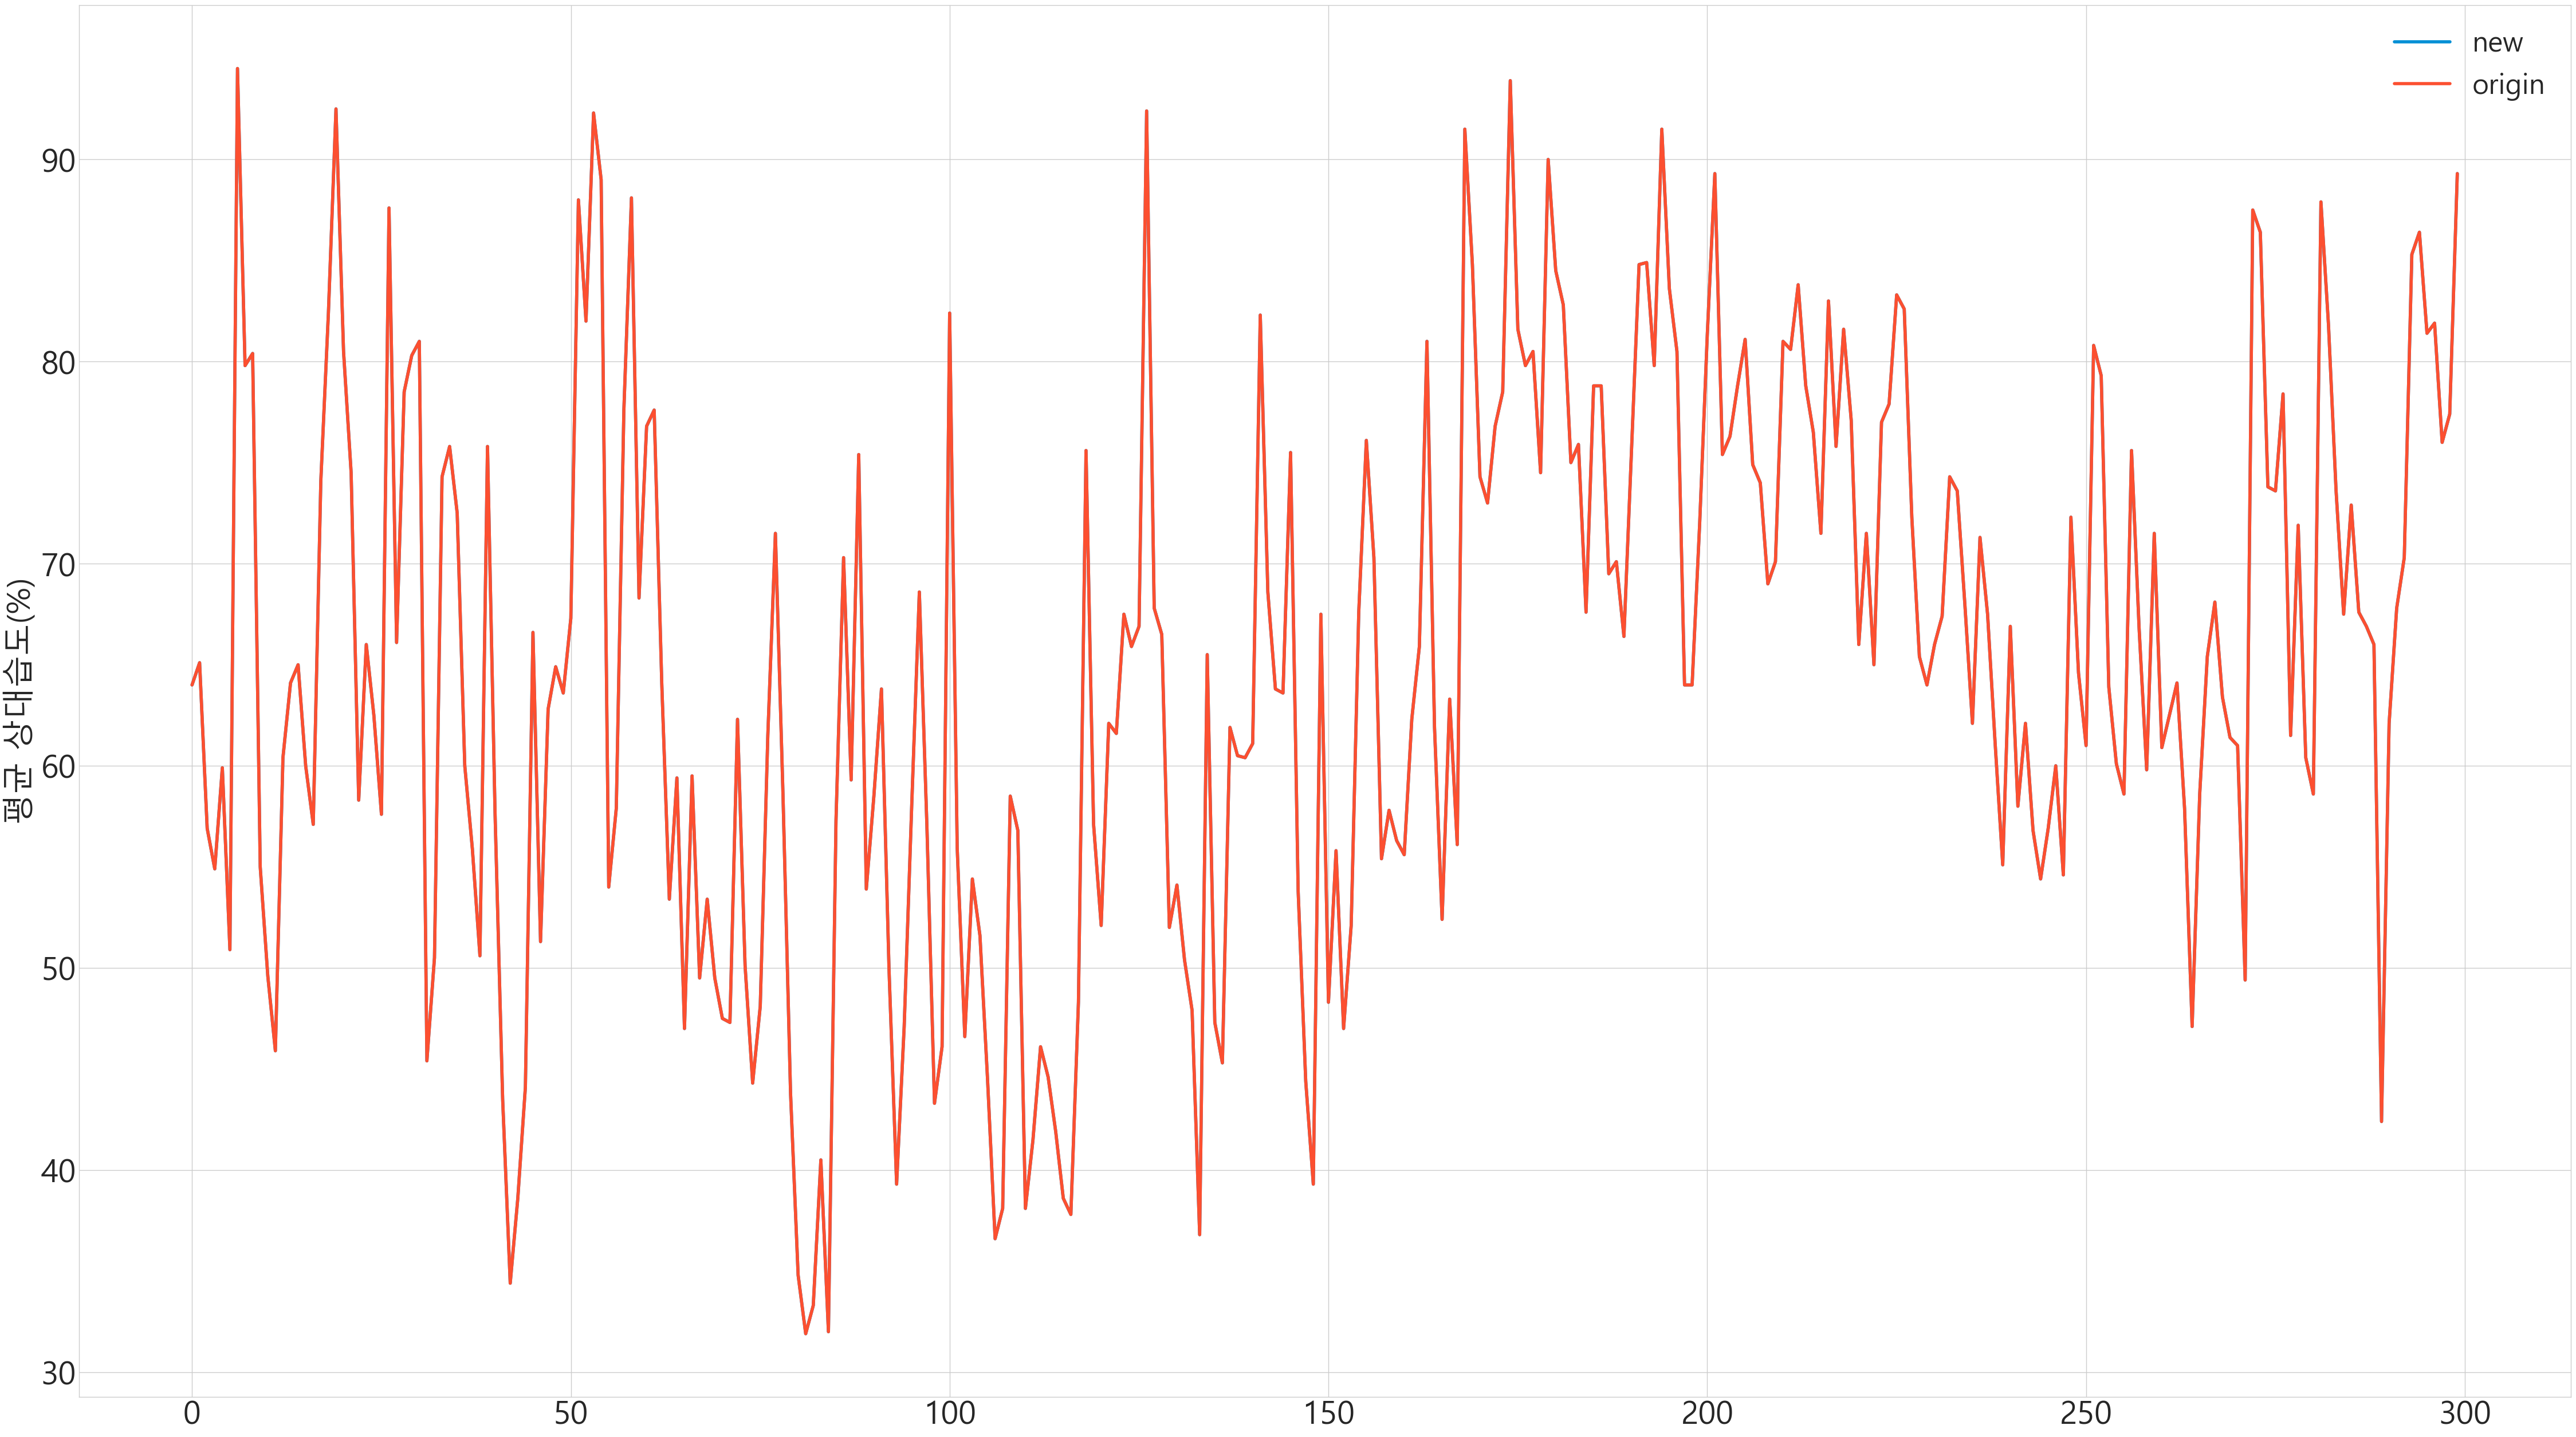

In [35]:
a=asos_interpoloate[20]  # 결측치를 보간한 데이터 
b=asos_data[asos_data['지점']==133] # 결측치가 있는 원본 데이터 
b.reset_index(drop=True,inplace=True) 

# default parameter
start=0
end=300

fig=plt.figure(figsize=(50,30),facecolor='white')
plt.plot(a.index[start:end],a['평균 상대습도(%)'][start:end])
plt.plot(a.index[start:end],b['평균 상대습도(%)'][start:end])
plt.xticks(fontsize= 40)
plt.yticks(fontsize= 40)
plt.ylabel("평균 상대습도(%)",fontsize= 40)
plt.legend(['new','origin'],fontsize=35)
plt.show()

In [36]:
imputed_data=pd.DataFrame()
for i in tqdm(range(len(asos_interpoloate))):
    imputed_data=pd.concat([imputed_data,asos_interpoloate[i]],axis=0)
    imputed_data.reset_index(drop=True,inplace=True)
imputed_data

  0%|          | 0/100 [00:00<?, ?it/s]

지점  지점명         일시  평균 상대습도(%)
0        90   속초 2001-01-01        37.4
1        90   속초 2001-01-02        28.6
2        90   속초 2001-01-03        18.9
3        90   속초 2001-01-04        16.6
4        90   속초 2001-01-05        22.8
...     ...  ...        ...         ...
702246  268  진도군 2022-12-27        83.4
702247  268  진도군 2022-12-28        79.9
702248  268  진도군 2022-12-29        75.9
702249  268  진도군 2022-12-30        67.8
702250  268  진도군 2022-12-31        72.6

[702251 rows x 4 columns]

In [37]:
imputed_data.info(null_counts=True) # 결측치를 보간한 데이터 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702251 entries, 0 to 702250
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   지점          702251 non-null  int32         
 1   지점명         702251 non-null  object        
 2   일시          702251 non-null  datetime64[ns]
 3   평균 상대습도(%)  701922 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 18.8+ MB


In [38]:
asos_data.info(null_counts=True) # 결측치 보간 전 데이터 정보 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702251 entries, 0 to 702250
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   지점          702251 non-null  float64       
 1   지점명         702251 non-null  object        
 2   일시          702251 non-null  datetime64[ns]
 3   평균 상대습도(%)  701235 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 21.4+ MB


In [39]:
imputed_data.to_csv('imputed_asos(ewm).csv',encoding='cp949')